In [1]:
import os
import sys
import torch
import numpy as np
from matplotlib import cm, pyplot as plt

from utils.utils import *
from utils.constants import CUTSIZEX, CUTSIZEY, AREA, GT_MS_COUNT, US_STATES, AFRICAN_COUNTRIES

import pdb

In [2]:
# Directories to the covariate data
nl_data = "/atlas/u/chenlin/objectcount/images/dnb_land_ocean_ice.2012.54000x27000_geo.tif"
pop_data = '/atlas/u/jesslec/ObjectCount/object_count/notebooks/visualization/population/gpw_v4_population_density_rev11_2020_30_sec.tif'

print("loading data")
raster_nl = rs.open(nl_data)
raster_nl_img = load_geotiff(nl_data)
raster_pop = rs.open(pop_data)
raster_pop_img = load_geotiff(pop_data)
print("Data loaded")

loading data
Data loaded


In [3]:
# country = "africa" # "us" or "africa"
# district = "nigeria" # check utils.constants.py

country = "us" # "us" or "africa"
district = "pennsylvania" # check utils.constants.py

In [4]:
sampling_method = "NL" # nightlight
# sampling_method = "population" # population

if sampling_method == "NL":
    r_data = raster_nl_img
else:
    r_data = raster_pop_img
print(f"processing {country} {district}", flush=True)
if country == "africa":
    if sampling_method == "NL":
        cutsizex = CUTSIZEX[sampling_method][district]
        cutsizey = CUTSIZEY[sampling_method][district]
    else:
        cutsizex = CUTSIZEX[sampling_method]["africa"]
        cutsizey = CUTSIZEY[sampling_method]["africa"]
else:
    cutsizex = CUTSIZEX[sampling_method]["us"]
    cutsizey = CUTSIZEY[sampling_method]["us"]
    
if district == "alaska":
    if sampling_method == "NL":
        cutsizex = [2000, 6000]
        cutsizey = [0, 8000]
    elif sampling_method == "population":
        cutsizex = [2000, 6000]
        cutsizey = [0, 6500]
if district == "hawaii":
    if sampling_method == "NL":
        cutsizex = [10000, 11000]
        cutsizey = [2500, 4000]
    elif sampling_method == "population":
        cutsizex = [8000, 9000]
        cutsizey = [2000, 3500]


processing us pennsylvania


In [5]:
print("Country {}, district {}".format(country, district))
log_root = "/atlas/u/jesslec/ObjectCount/object_count/notebooks/visualization"
pth_mask = f'{log_root}/saved_data/{sampling_method}/{cutsizex[0]}_{cutsizex[1]}_{cutsizey[0]}_{cutsizey[1]}_{district}_mask.pth'
binary_m = torch.load(pth_mask)

if not os.path.isfile(pth_mask):
    print("mask {} not exist {} {}".format(pth_mask, country, district), flush=True)
else:
    print("mask loaded")

Country us, district pennsylvania
mask loaded


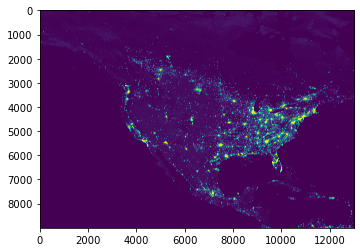

In [6]:
img = r_data[cutsizex[0]:cutsizex[1], cutsizey[0]: cutsizey[1]] # only unmasked pixels
if sampling_method == "NL":
    plt.imshow(img)
else:
    plt.imshow(np.log(np.clip(img, a_min=1e-20, a_max=1e20)))

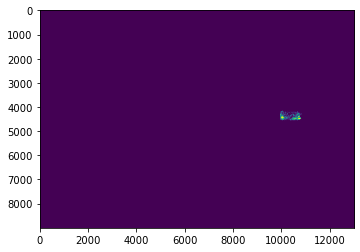

In [7]:
img = img * binary_m
if sampling_method == "NL":
    plt.imshow(img)
else:
    plt.imshow(np.log(np.clip(img, a_min=1e-20, a_max=1e20)))

In [8]:
# img.shape, r_data.shape, cutsizex, cutsizey#[cutsizex[0],cutsizex[1]][cutsizey[0], cutsizey[1]]